# 통계 데이터 분석 HW1

In [3]:
import numpy as np
from scipy import stats
import scipy.stats

import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

matplotlib.rc('font', family = 'Malgun Gothic')
plt.rc('font', family = 'Malgun Gothic')

In [4]:
ds_mycars = pd.read_csv("Datas/mycars.csv", engine = "python")
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


### 시내에서 연비 통계치 : 구동 방식별

In [5]:
driving_mpg_df = ds_mycars[['driving', 'mpg']]
driving_mpg_df.head()

,driving,mpg
0,f,18
1,f,21
2,f,20
3,f,21
4,f,16


In [6]:
driving_mpg_df.groupby('driving').describe().round(3)

mpg                                             
         count    mean    std   min   25%   50%   75%   max
driving                                                    
4        103.0  14.330  2.874   9.0  13.0  14.0  16.0  21.0
f        106.0  19.972  3.627  11.0  18.0  19.0  21.0  35.0
r         25.0  14.080  2.216  11.0  12.0  15.0  15.0  18.0

### 고속도로에서 연비 통계치 : 구동 방식별

In [7]:
driving_highway_df = ds_mycars[['driving', 'highway_mileage']]
driving_highway_df.head()

,driving,highway_mileage
0,f,29
1,f,29
2,f,31
3,f,30
4,f,26


In [8]:
driving_highway_df.groupby('driving').describe().round(3)

highway_mileage                                             
                  count    mean    std   min   25%   50%   75%   max
driving                                                             
4                 103.0  19.175  4.079  12.0  17.0  18.0  22.0  28.0
f                 106.0  28.160  4.207  17.0  26.0  28.0  29.0  44.0
r                  25.0  21.000  3.663  15.0  17.0  21.0  24.0  26.0

### 자동차의 데이터에 대해 counts, percents, cumultative counts, cumulative percents 계산하기

In [19]:
df = ds_mycars[['driving', 'mpg']]
df.head()

count = df['driving'].value_counts().sort_index()
percent = count / sum(count) * 100
cumcnt = np.cumsum(count)
cumpct = np.cumsum(percent)
count_data = pd.DataFrame({'Count' : count, 'Percent' : percent, 'CumCnt' : cumcnt, 'CumPct' : cumpct})
count_data.columns.name = 'driving'
count_data

driving,Count,Percent,CumCnt,CumPct
4,103,44.017094,103,44.017094
f,106,45.299145,209,89.316239
r,25,10.683761,234,100.000000


## 확률분포

### 대한민국 남성의 20~30대 키를 측정한 결과, 평균 175cm, 표준편차 5cm이다. 내 키가 180cm일 경우 나는 몇 % 범위에 속할까요?

In [18]:
mu = 175
sigma = 5
my_height = 180
prob = stats.norm.cdf(my_height, mu, sigma)
print("{0}cm은 상위 : {1:.1f}%".format(my_height, (1 - prob)*100))

180cm은 상위 : 15.9%


### 1리터를 가지고 9km 이상 15km 이하를 달릴 확률 (평균 = 12km, 표준편차 = 3km)

In [21]:
mu = 12
sigma = 3
distance1 = 9
distance2 = 15
prob = stats.norm.cdf(distance2, mu, sigma)
print("{0}km이상 {1}km 이하를 달릴 확률은 {2:.1f}%에 해당함".format(distance1, distance2, 2 * (prob - 0.5) * 100))

9km이상 15km 이하를 달릴 확률은 68.3%에 해당함


## T 분포

### 확률 변수 t는 자유도가 100인 t-분포를 따른다. t값이 2.0 일때 P(T<=t)을 계산해보세요

In [23]:
t = 2.0
df = 100
prob = stats.t.cdf(t, df)
print("P(T<=F): {:.3f}".format(prob))

P(T<=F): 0.976


## 카이제곱 분포

### 분포 그리기 연습 (자유도 변화에 따른 분포 번화 이해하기)

##### Random Data 생성 : n = 1,000, degree of freedom = 3

np.random.seed(seed = 1234)
chisq_df3 = np.random.chisquare(df = 3, size = 1000)
sns.distplot(chisq_df3, fit = stats.norm, kde = False)

##### Random Data 생성 : n = 1,000, degree of freedom = 50

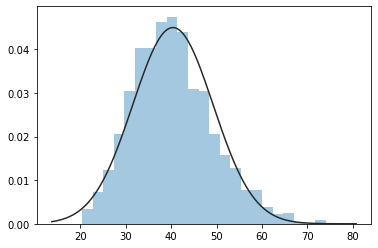

In [26]:
np.random.seed(seed = 1234)
chisq_df40 = np.random.chisquare(df = 40, size = 1000)
sns.distplot(chisq_df40, fit = stats.norm, kde = False)

### 확률변수 카이제곱은 자유도가 8인 카이제곱 분포를 따른다. 카이제곱 값이 3일 때 P(X<=카이제곱)을 계산하시오

In [29]:
chisq = 10
df = 30

prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}) : {1:.4f}".format(chisq, prob))

P(X<=10) : 0.0002


## F 분포

### 확률변수 F는 자유도가 10, 100인 F-분포를 따른다. F값이 1.5 일 때 P(X<=F)을 계산하시오.

In [33]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x = f, dfn = dfnum, dfd = dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.850
